In [1]:
# Import Data, clean and set Stopword.
import pandas as pd
import numpy as np

In [2]:
PATH = "C:\\Users\\malan\\Downloads\\News_data\\Fake_True_News\\"

Fake_news = data.read_csv(PATH+'"C:\Users\malan\OneDrive - University of Pretoria\fake (tshivenda ).xlsx"')
True_news = data.read_csv(PATH+'C:\\Users\\malan\\Downloads\\News_data\\True.csv')

Fake_news = Fake_news.drop(['date','subject'], axis=1)
True_news = True_news.drop(['date','subject'], axis=1)
# using binary numbers to label the data 
Fake_news['label'] = 0 #Fake news is denote as 0
True_news['label'] = 1 #True news is denote as 1

In [4]:
"""
Remove every punctuations and numbers from the sentences
and filter stopwords using nltk corpus
"""
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
stop_list = set(stopwords.words('english'))

punc = '''!()-–[]{};:`’‘“'"\, <>.+=/?@#$”%^&…*_~'''
numbers = '''0123456789'''

X= [] #Prepare a list for feature set

#Filter out the fake news
for text in Fake_news.text:
    for word in text:
        text = text.replace(word, word.lower()) 
        if word in punc:  
            text = text.replace(word, " ") 
        if word in numbers:  
            text = text.replace(word, " ") 
            
    text = data.Series(text)
    text_list = text.str.split()[0]
    filtered_words = []
    for word in text_list:
        if word not in stop_list:
            filtered_words.append(word)
    X.append(filtered_words)

#Filter out the true news
for text in True_news.text:
    for word in text:
        text = text.replace(word, word.lower()) 
        if word in punc:  
            text = text.replace(word, " ") 
        if word in numbers:  
            text = text.replace(word, " ") 
            
    text = pd.Series(text)
    text_list = text.str.split()[0]
    filtered_words = []
    for word in text_list:
        if word not in stop_list:
            filtered_words.append(word)
    X.append(filtered_words)

#Create the label
y = np.zeros(len(Fake_news)+len(True_news))
y[len(True_news):] = 1

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, 
                                                  random_state=512)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(X_train)

token_dict = tokenizer.word_index

seq_train = tokenizer.texts_to_sequences(X_train)
seq_train = pad_sequences(seq_train, padding='post', maxlen=200)

seq_val = tokenizer.texts_to_sequences(X_val)
seq_val = pad_sequences(seq_val, padding='post', maxlen=200)

In [7]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=75),
    tf.keras.layers.SpatialDropout1D(0.2),
#    tf.keras.layers.LSTM(75, dropout=0.2, recurrent_dropout=0.2, 
#                         return_sequences=True),
    tf.keras.layers.LSTM(75, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(seq_train, y_train, epochs=10, batch_size=128, 
          validation_data=(seq_val, y_val))

Epoch 1/10
281/281 [==============================] - 204s 724ms/step - loss: 0.3561 - accuracy: 0.8322 - val_loss: 0.1955 - val_accuracy: 0.9434
Epoch 2/10
281/281 [==============================] - 203s 722ms/step - loss: 0.1873 - accuracy: 0.9409 - val_loss: 0.1493 - val_accuracy: 0.9640
Epoch 3/10
281/281 [==============================] - 203s 723ms/step - loss: 0.1765 - accuracy: 0.9415 - val_loss: 0.2201 - val_accuracy: 0.9155
Epoch 4/10
281/281 [==============================] - 202s 719ms/step - loss: 0.2237 - accuracy: 0.9067 - val_loss: 0.1418 - val_accuracy: 0.9432
Epoch 5/10
281/281 [==============================] - 201s 717ms/step - loss: 0.2529 - accuracy: 0.9018 - val_loss: 0.2021 - val_accuracy: 0.9372
Epoch 6/10
281/281 [==============================] - 201s 715ms/step - loss: 0.2146 - accuracy: 0.9296 - val_loss: 0.1951 - val_accuracy: 0.9381
Epoch 7/10
281/281 [==============================] - 201s 715ms/step - loss: 0.1787 - accuracy: 0.9440 - val_loss: 0.1630 -

In [17]:
#data visulization 
training_loss = history.history['loss']
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
epoch = np.arange(0,10)

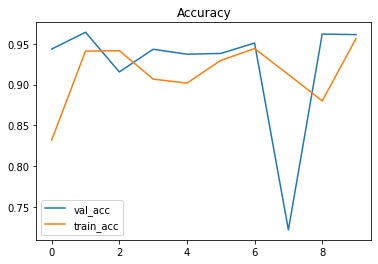

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(epoch, val_acc)
plt.plot(epoch, train_acc)
plt.title('Accuracy')
plt.legend(['val_acc', 'train_acc'])

Text(0.5, 1.0, 'Train Loss')

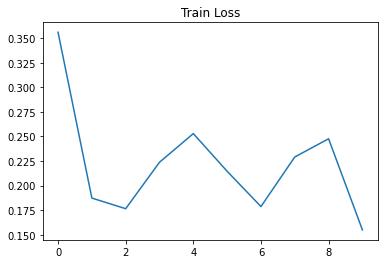

In [23]:
plt.plot(epoch, training_loss)
plt.title('Train Loss')